In [ ]:
# Cell 1: Import required libraries
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from transformers import RTDetrImageProcessor, RTDetrForObjectDetection
import os

IMAGE_PATH = "C:\\Users\\Mechatronics Lab\\Downloads\\rain1.png"

MODEL_PATH = "./outputs"  # Path to your trained model, or set to None for pretrained
CONFIDENCE_THRESHOLD = 0.3

print(f"Image path: {IMAGE_PATH}")
print(f"Model path: {MODEL_PATH}")
print(f"Confidence threshold: {CONFIDENCE_THRESHOLD}")

Image path: C:\Users\Mechatronics Lab\Downloads\rain1.png
Model path: ./outputs
Confidence threshold: 0.3


In [2]:
# Cell 3: Load model and processor
print("Loading RT-DETR model and processor...")

# Load processor
processor = RTDetrImageProcessor.from_pretrained("PekingU/rtdetr_r50vd")
model = RTDetrForObjectDetection.from_pretrained("PekingU/rtdetr_r50vd")

# Set device and move model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
model.eval()

print(f"Model loaded on device: {device}")

class_names = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

Loading RT-DETR model and processor...
Model loaded on device: cuda


Quick inference function defined!
Usage: quick_inference('path/to/image.jpg', threshold=0.3)


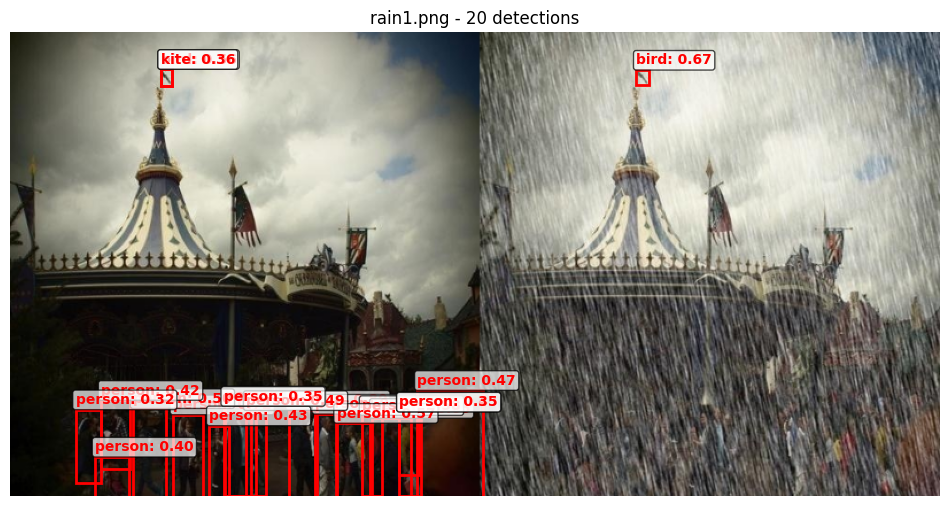

Processed: rain1.png
Detections: 20
  1. person: 0.802
  2. person: 0.728
  3. person: 0.723
  4. bird: 0.669
  5. person: 0.650
  6. person: 0.579
  7. person: 0.579
  8. person: 0.573
  9. bird: 0.560
  10. person: 0.500
  11. person: 0.489
  12. person: 0.475
  13. person: 0.431
  14. person: 0.426
  15. person: 0.421
  16. person: 0.402
  17. kite: 0.355
  18. person: 0.352
  19. person: 0.347
  20. person: 0.318


In [3]:
# Cell 10: Quick function for testing other images (optional)
def quick_inference(image_path, threshold=0.3, show_details=True):
    """Quick inference function for testing other images"""
    
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return
    
    # Load image
    test_image = Image.open(image_path).convert("RGB")
    
    # Preprocess
    inputs = processor(images=test_image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Inference
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Post-process
    target_sizes = torch.tensor([test_image.size[::-1]]).to(device)
    results = processor.post_process_object_detection(
        outputs, threshold=threshold, target_sizes=target_sizes
    )[0]
    
    boxes = results["boxes"].cpu().numpy()
    scores = results["scores"].cpu().numpy()
    labels = results["labels"].cpu().numpy()
    
    # Visualize
    plt.figure(figsize=(12, 8))
    plt.imshow(test_image)
    
    for box, score, label in zip(boxes, scores, labels):
        x1, y1, x2, y2 = box
        class_name = class_names[label] if label < len(class_names) else f"class_{label}"
        
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                           fill=False, color='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        plt.text(x1, y1-5, f"{class_name}: {score:.2f}", 
                color='red', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))
    
    plt.title(f"{os.path.basename(image_path)} - {len(boxes)} detections")
    plt.axis('off')
    plt.show()
    
    if show_details:
        print(f"Processed: {os.path.basename(image_path)}")
        print(f"Detections: {len(boxes)}")
        for i, (box, score, label) in enumerate(zip(boxes, scores, labels)):
            class_name = class_names[label] if label < len(class_names) else f"class_{label}"
            print(f"  {i+1}. {class_name}: {score:.3f}")

print("Quick inference function defined!")
print("Usage: quick_inference('path/to/image.jpg', threshold=0.3)")

quick_inference(IMAGE_PATH, threshold=CONFIDENCE_THRESHOLD)